In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD




In [2]:
# Load the dataset from CSV
data = pd.read_csv('cluster.csv')  # Replace 'your_dataset.csv' with your CSV file path
texts = data['text']  # Replace 'text_column' with the column containing text data
data


,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
1995,i just keep feeling like someone is being unki...,3
1996,im feeling a little cranky negative after this...,3
1997,i feel that i am useful to my people and that ...,1
1998,im feeling more comfortable with derby i feel ...,1


In [3]:
# Text vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(texts)
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X)
cluster_labels = kmeans.labels_


C:\Users\Hxtreme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
# Reduce dimensionality for visualization using TruncatedSVD (2 components)
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X)



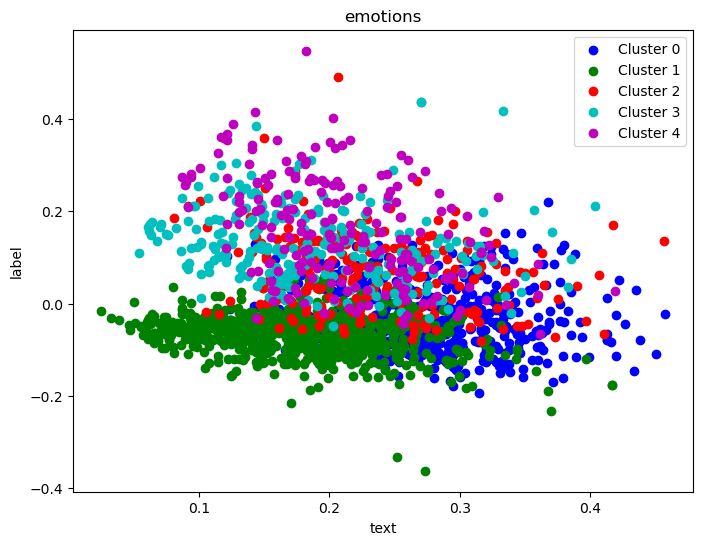

In [5]:

# Plotting the clusters
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(len(set(cluster_labels))):
    plt.scatter(X_svd[cluster_labels == i, 0], X_svd[cluster_labels == i, 1], color=colors[i], label='Cluster {}'.format(i))

plt.title('emotions')
plt.xlabel('text')
plt.ylabel('label')
plt.legend()
plt.show()
